In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv('D:\\anylitics l\\case study files\\python\\Python Foundation Case Study 4 - Python Visualization Case Study\\SalesData.csv')
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


Q1. Compare Sales by region for 2016 with 2015 using bar chart


In [3]:
sales_per_region=pd.pivot_table(data=sales,index="Region",values=["Sales2015","Sales2016"],aggfunc='sum')
sales_per_region

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


<AxesSubplot:xlabel='Region'>

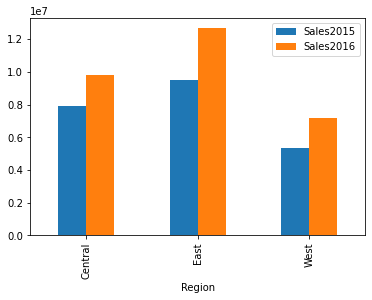

In [4]:
sales_per_region.plot(kind="bar")

Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a
Pie Chart.

In [5]:
sales_pie=pd.pivot_table(data=sales,index="Region",values="Sales2015",aggfunc='sum')
sales_pie

,Sales2015
Region,
Central,7.891729e+06
East,9.512916e+06
West,5.349745e+06


array([<AxesSubplot:ylabel='Sales2015'>], dtype=object)

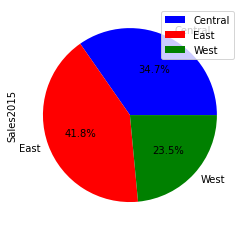

In [6]:
sales_pie.plot(kind="pie",labels=["Central","East","West"],colors=['b','r','g'],autopct='%.1f%%',fontsize=10,subplots='true')

Q3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [7]:
regions_tiers=pd.pivot_table(data=sales,index=["Region","Tier"],values=["Sales2015","Sales2016"],aggfunc='sum')
regions_tiers

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

<AxesSubplot:xlabel='Region,Tier'>

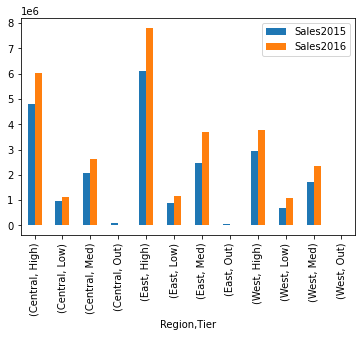

In [8]:
regions_tiers.plot(kind="bar")

Q4. In East region, which state registered a decline in 2016 as compared to 2015?

In [10]:
East_state=pd.pivot_table(data=sales[sales.Region=='East'],
                            index='State',
                            values=["Sales2015","Sales2016"],aggfunc='sum')
East_state

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


<AxesSubplot:xlabel='State'>

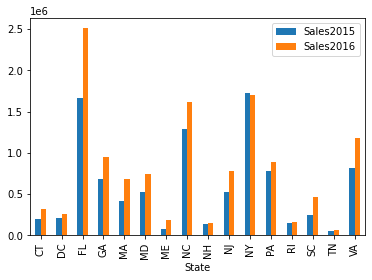

In [11]:
East_state.plot(kind="bar")

Q5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared
to 2015?

In [12]:
High_tier=pd.pivot_table(data=sales[sales.Tier=='High'],
                            index='Division',
                            values=["Units2015","Units2016"],aggfunc='sum')
High_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<AxesSubplot:xlabel='Division'>

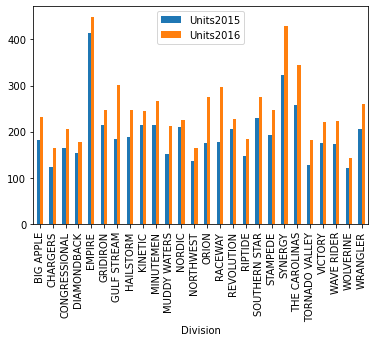

In [13]:
High_tier.plot(kind="bar")

Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported
dataset. The Quarters are based on months and defined as -

• Jan - Mar : Q1 • Apr - Jun : Q2 • Jul - Sep : Q3 • Oct - Dec : Q4

In [14]:
sales["Qtr"]=np.where((sales.Month=="Jan")|(sales.Month=="Feb")|(sales.Month=="Mar"),"Q1",
                     np.where((sales.Month=="Apr")|(sales.Month=="May")|(sales.Month=="Jun"),"Q2",
                              np.where((sales.Month=="Jul")|(sales.Month=="Aug")|(sales.Month=="Sep"),"Q3",
                                        "Q4")))
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [15]:
qtr_sales=pd.pivot_table(data=sales,index="Qtr",values=["Sales2015","Sales2016"],aggfunc='sum')
qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


<AxesSubplot:xlabel='Qtr'>

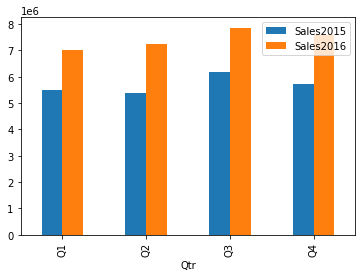

In [16]:
qtr_sales.plot(kind="bar")

Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a
pie chart.

In [17]:
sales["Sales2016"]=np.where(sales.Sales2016<0,sales.Sales2016.mean(),
                                        sales["Sales2016"])
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


In [18]:
sales_pie_2016=pd.pivot_table(data=sales,index="Tier",columns="Qtr",values="Sales2016",aggfunc='sum')
sales_pie_2016

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3.963147e+06,4.150526e+06,4.883454e+06,4.760945e+06
Low,9.590398e+05,9.199262e+05,8.053847e+05,7.606046e+05
Med,2.191561e+06,2.234721e+06,2.197058e+06,2.124103e+06
Out,0.000000e+00,0.000000e+00,7.998040e+03,0.000000e+00


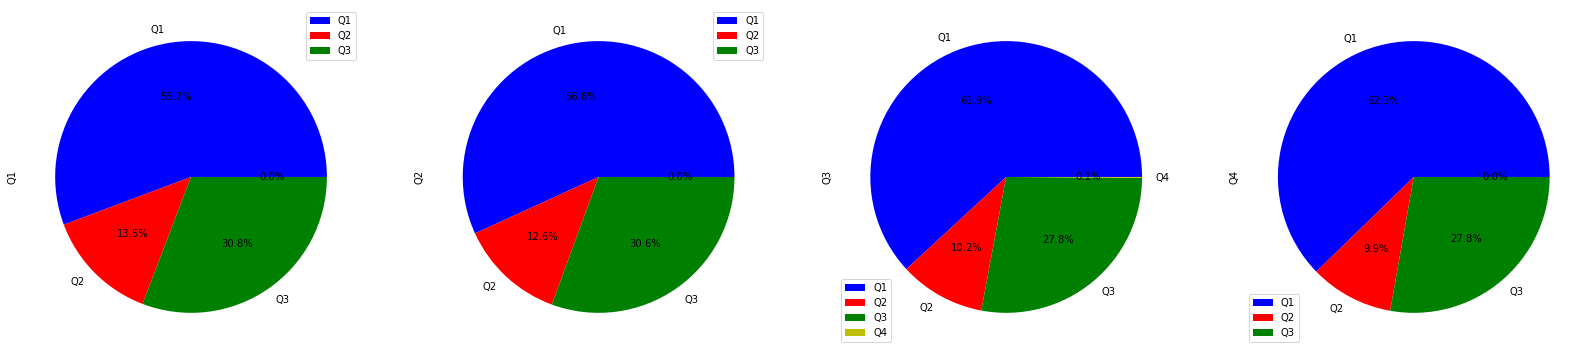

In [19]:
sales_pie_2016.plot(kind="pie",labels=["Q1","Q2","Q3","Q4"],colors=['b','r','g','y'],
                    autopct='%.1f%%',fontsize=10,subplots='true',
                    figsize=(28,10))


plt.show()